# Python API examples of the package `tracking_physmed`

## `tracking_physmed`
The package is built in the following way:
- The main class called `Tracking` reads the `.h5` file generated by [DeepLabCut](https://github.com/DeepLabCut/DeepLabCut).
- There is a `plotting` module with a lot of different plots (to plot speed, 2D position, likelihood of the tracking response, head direction, x or y position, etc.) with different options (DLC label, with or without animation, etc.)
- There is also a GUI module that is used by `Tracking` one some occasions, mainly to add some important information to the metadata.

To instantiate a `Tracking` class, we need to use the `load_tracking` function.  
The function needs at least the tracking filename and it will try to find the metadata and the video associated with the filename in the same folder.  
The metadata filename and the labeled video filename can be passed as arguments as well.

In [4]:
from tracking_physmed import load_tracking
from pathlib import Path

# typical tracking file
tracking_path = Path(r"./src/tracking_physmed/io/test/data/sub-rat2306_ses-20210727_task-openfield_tracksys-DLC_motion.tsv")

trk = load_tracking(tracking_path)

(<Figure size 1200x600 with 1 Axes>, <Axes: xlabel='time (s)', ylabel='cm/s'>)

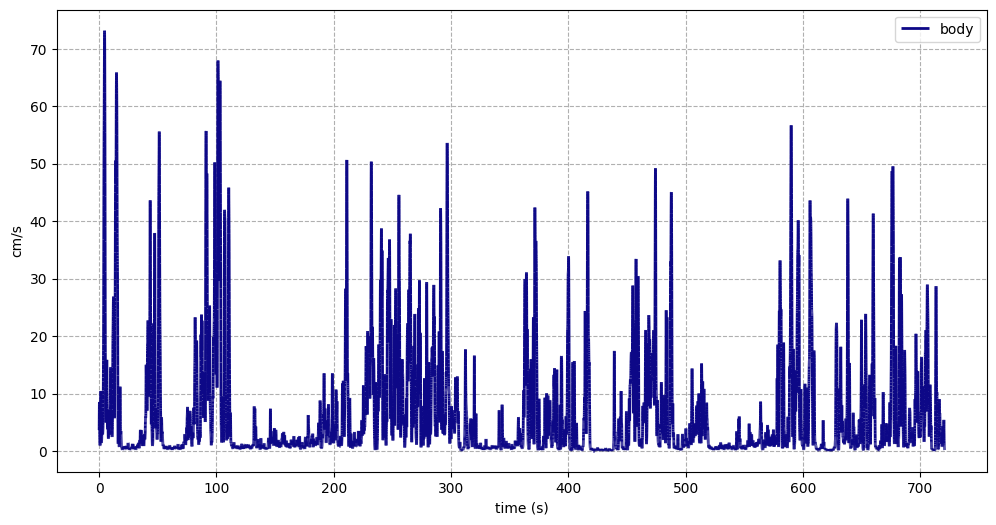

In [5]:
from tracking_physmed.plotting import plot_speed

plot_speed(trk)

### `Tracking`
The class has some DLC information as its attribute:

In [7]:
print(
    f"Video filepath: {trk.video_filepath}\n"
    f"Bodyparts: {trk.labels}\n"
    f"Video fps: {trk.fps}\n"
    f"Number of frames: {trk.nframes}"
)

Video filepath: None
Bodyparts: ['body', 'neck', 'probe', 'snout', 'tailbase']
Video fps: 50.0
Number of frames: 36037


And some main information right out of the box:

In [8]:
trk.print_infos()

--------------------------------------------------------------
Total tracking time: 720.74 seconds
Total running time: 399.98 seconds
Total distance run: 4007.22 centimeter
Running time ratio (running time / all time): 0.55
Exploration ratio (ratio of visited bins): 0.870
Exploration std (std of visits on each bin): 1334.897
Running speed (only running periods): 10.02 centimeter/seconds
Mean running speed: 6.49 centimeter/seconds
--------------------------------------------------------------


The position of the labels in DLC are obviouly in terms of pixels. We need to let the `Tracking` class know how to transform it to centimeters or meters, if that's what we want.  
This can be done with `set_ratio_coords()` and it will prompt you a GUI to select the corner of the square or rectangle in the video.  
The coordinates can alse be set by `set_ratio_coords(coord_list=[[top_left_x, top_left_y],[top_right_x, top_right_y],[bottom_left_x, bottom_left_y],[bottom_right_x, bottom_right_y]])`  
This coordinates will calculate the cm2px ratio calculating the distance between the coordinates and the parameter `Tracking.w` and `Tracking.h` that are initiated as 100 and can be changed

\* Note: For now this can only do rectangular shaped arenas. (maybe circular ones in the future?)

In [9]:
trk.w = 100
trk.h = 150
trk.set_ratio_coords()

AttributeError: 'Tracking' object has no attribute 'metadata'

The actual data recovered from the `.h5` file is in the attribute `Dataframe`

In [10]:
trk.Dataframe[:10]

,body_x,body_y,body_likelihood,neck_x,neck_y,neck_likelihood,probe_x,probe_y,probe_likelihood,snout_x,snout_y,snout_likelihood,tailbase_x,tailbase_y,tailbase_likelihood
0,93.15962543391814,6.0810801036934965,0.9999834299087524,97.16798463397694,14.286940619151093,0.9999983310699464,97.6792504764384,16.795914901162263,0.999997615814209,97.3723361846725,17.699170711335263,0.0235749147832393,89.00535491956596,3.615686784646358,0.999985933303833
1,93.322739898268,6.0810801036934965,0.9999841451644896,97.28468003621838,14.53016329729094,0.9999979734420776,97.68179099052986,17.018203574942408,0.9999983310699464,97.89973681530432,17.786418863321064,0.4720936715602875,89.01644232874663,3.665599053630569,0.9999902248382568
2,93.4267411423504,6.226947253420708,0.9999754428863524,97.43555460651828,14.557023765814362,0.9999980926513672,98.01217559459778,17.018203574942408,0.9999984502792358,98.30679110622548,17.786418863321064,0.9998832941055298,89.08934330595426,3.687784387364797,0.9999908208847046
3,93.56640211899489,6.243862282259878,0.9999885559082032,97.47086102255108,14.62718864299467,0.9999977350234984,98.01225130528262,17.07109169445595,0.9999945163726808,98.33434138321084,17.801268672923623,0.1965250670909881,89.10255902660892,3.738768172847027,0.9999924898147584
4,93.71254056534278,6.259656372348422,0.9999819993972778,97.4783732049474,14.62718864299467,0.9999988079071044,98.05120024648632,17.07109169445595,0.9999916553497314,98.33434138321084,17.95025257917696,0.0797797366976738,89.11937521094286,3.745105788090945,0.9999938011169434
5,93.81029147177628,6.331045238933728,0.9999723434448242,97.4783732049474,14.667664416342756,0.9999985694885254,98.05120024648632,17.09375232304504,0.9999961853027344,98.33434138321084,18.019511031213707,0.9980185031890868,89.33153337447581,3.7706244950329424,0.999991774559021
6,93.81029147177628,6.33410836705809,0.9999876022338868,97.4783732049474,14.667664416342756,0.9999983310699464,98.05120024648632,17.09375232304504,0.9999839067459106,98.38253544026396,18.019511031213707,0.0211386010050773,89.40127973981488,3.7706244950329424,0.9999922513961792
7,93.89065415759032,6.5487481585942895,0.9999790191650392,97.4783732049474,14.667664416342756,0.9999988079071044,98.05120024648632,17.09375232304504,0.99998939037323,98.51522262160437,18.21766482112486,0.0139121674001216,89.5638389924759,3.7706244950329424,0.9999889135360718
8,93.948202690371,6.674072475833498,0.9999843835830688,97.4783732049474,14.78705385711993,0.9999979734420776,98.05120024648632,17.113161598334944,0.9999988079071044,98.5227516285973,18.21766482112486,0.9995187520980836,89.68488355294676,4.019429784642837,0.99998676776886
9,93.95084415204228,6.703235811020961,0.9999897480010986,97.47086102255108,14.810831218310488,0.9999984502792358,98.01225130528262,17.231686675460136,0.9999996423721312,98.51522262160437,18.481506042437555,0.999947190284729,89.75500847171007,4.226068428943101,0.9999855756759644


What you will want to use for the analysis are the "get methods" that can be found here

In [11]:
get_methods = [m for m in dir(trk) if m.startswith("get")]
print(get_methods)

['get_binned_position', 'get_degree_interval_hd', 'get_direction_angular_velocity', 'get_direction_array', 'get_direction_histogram', 'get_grid_field_array', 'get_index', 'get_infos', 'get_place_field_array', 'get_position_x', 'get_position_y', 'get_proximity_from_center', 'get_proximity_from_corner', 'get_proximity_from_wall', 'get_running_bouts', 'get_speed', 'get_xy_coords']


In [12]:
trk.get_speed?

Signature:
trk.get_speed(
    bodypart='body',
    axis='xy',
    euclidean_distance=False,
    smooth=True,
    speed_cutout=0,
    only_running_bouts=False,
)
Docstring:
Gets speed for given `bodypart`. When getting the distance between frames, the first index is hard set to be 0 so that the output array has the same length as the number of frames.

Parameters
----------
bodypart : str, optional
    Name of the label to get the speed from, by default 'body'.
axis : str, optional
    To compute Vx, Vy or V, axis is 'x', 'y' or 'xy', respectively. By default 'xy'.
euclidean_distance : bool, optional
    If ``axis`` is only one dimension, the distance can be the euclidean (absolute) or real. By default False.
smooth : bool, optional
    If True a Gaussian window will convolve the speed array, by default True.
    The parameters of the Gaussian window can be set via the self.speed_smooth_window variable.
speed_cutout : int, optional
    If given it will set the speed values under this th

### `plotting`

To plot things we have the `plotting` module with most of the important plots you want to analyse the data

In [13]:
from tracking_physmed import plotting
import matplotlib.pyplot as plt

plot_methods = [m for m in dir(plotting) if m.startswith("plot")]
print(plot_methods)

['plot_center_proximity', 'plot_corner_proximity', 'plot_head_direction', 'plot_head_direction_interval', 'plot_likelihood', 'plot_occupancy', 'plot_position', 'plot_position_2d', 'plot_position_x', 'plot_position_y', 'plot_running_bouts', 'plot_speed', 'plot_wall_proximity']


In [14]:
plotting.plot_speed?

Signature:
plotting.plot_speed(
    Trk_cls: tracking_physmed.tracking.tracking.Tracking,
    bodypart='body',
    speed_axis='xy',
    euclidean=False,
    smooth=True,
    speed_cutout=0,
    only_running_bouts=False,
    alpha=1.0,
    ax=None,
    fig=None,
    figsize=(12, 6),
    animate_video=False,
    animate_fus=False,
    **ax_kwargs,
)
Docstring:
Plot speed of given label.

Parameters
----------
Trk_cls : :class:`tracking_physmed.tracking.Tracking` instance
bodypart : str, optional
    Bodypart label. Default is "body"
smooth : bool, optional
    If speed array is to be smoothed using a gaussian kernel. Default is ``True``.
speed_cutout : int, optional
    If speed is to be thresholded by some value. Default is 0
only_running_bouts : bool, optional
    If should plot only the running periods using :class:`tracking_physmed.tracking.Tracking.get_running_bouts` function. Default is ``False``.
ax : matplotlib Axes, optional
    If None, new axes is created in `fig`. Default is 

(<Figure size 1400x700 with 1 Axes>,
 <Axes: xlabel='time (s)', ylabel='Proximity from left wall (a.u)'>)

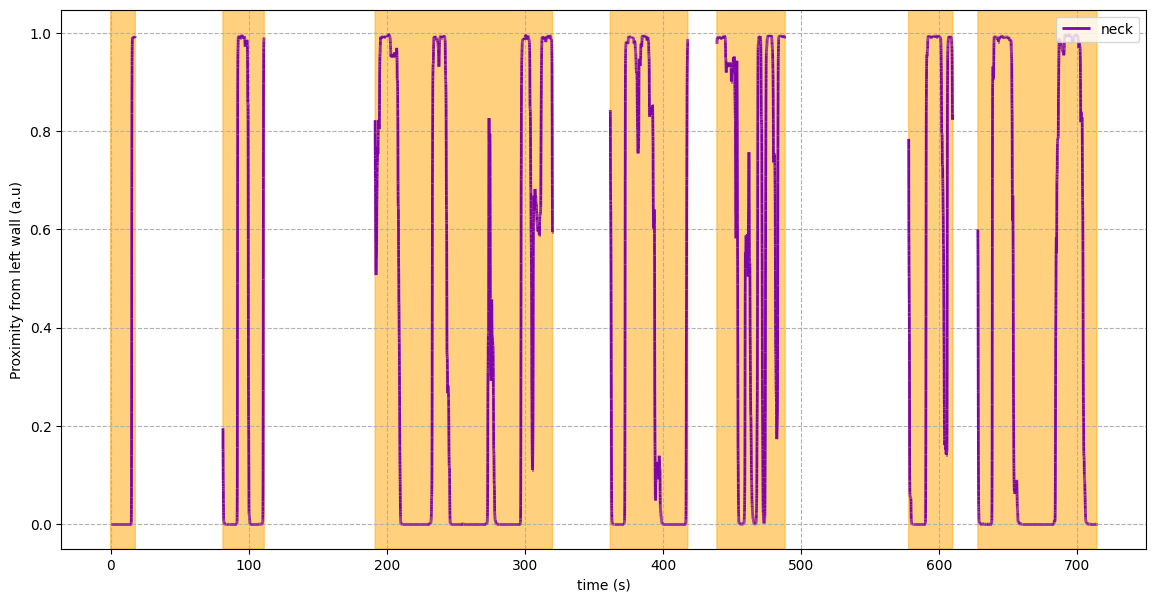

In [15]:
plotting.plot_wall_proximity(trk, wall="left", only_running_bouts=True)

(<Figure size 1200x600 with 1 Axes>, <Axes: xlabel='time (s)', ylabel='cm/s'>)

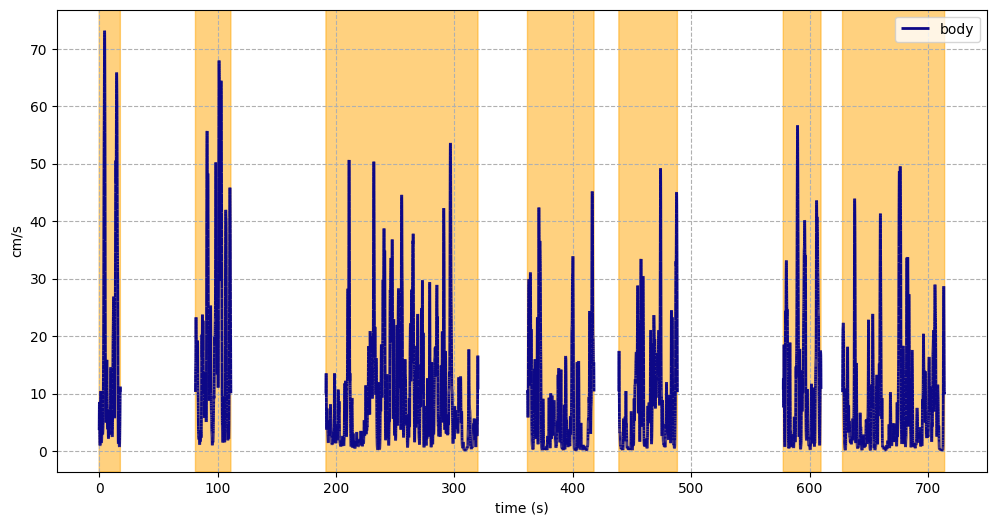

In [16]:
plotting.plot_speed(trk, only_running_bouts=True)